# QSL for realization of a Hadamard Gate

In [35]:
import numpy as np
import QDYN
from QDYN.shutil import mkdir
from QDYN.pulse import Pulse, pulse_tgrid
from QDYN.gate2q import Gate2Q
from QDYN.linalg import norm, vectorize
from os.path import join
from notebook_utils import (
    get_zeta_table, plot_zeta_data, filter_table, get_logical_energies_table,
    get_stage4_table, bare_decomposition, get_transition_table, J_target,
    get_w_d_from_config, read_target_gate)
from mgplottools.io import writetotxt
from select_for_stage4 import GATE_RE, GATE_IM, GATE
from generate_zeta_universal import write_config
from analytical_pulses import AnalyticalPulse
from run_oct import propagate
from collections import OrderedDict
from zeta_systematic_variation import systematic_variation
import pandas as pd
import QDYNTransmonLib
from mgplottools.io import writetotxt
import json
from select_for_prop import prepare_prop
from notebook_utils import get_Liouville_error

In [2]:
H_left = GATE['H_left']
def write_target_gate_dat(rf, gate):
    writetotxt(join(rf, 'target_gate.dat'), GATE_RE[gate], GATE_IM[gate])

In [3]:
def F_avg_H_left(U):
    if U is None:
        return None
    else:
        return U.F_avg(H_left)

In [4]:
from multiprocessing import Process
import os
def system(cmd):
    p = Process(target=os.system, args=(cmd,))
    p.start()
    return p

In [49]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

/data/goerz/jobs/ConstrainedTransmon/venv/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [6]:
n_qubit = 5; n_cavity = 6

In [7]:
wc = 6.2 # GHZ
w2 = 5.9 # GHz
w1 = 6.00 # GHz
root = './QSL_H1/w2_%dMHz_wc_%dMHz' % (w2*1000, wc*1000)
mkdir(root)

## T = 100

In [8]:
T = 100
nt = 5000
rf_100 = join(root, '%d' % T); mkdir(rf_100)
write_target_gate_dat(rf_100, 'H_left')

In [9]:
rf_100

'./QSL_H1/w2_5900MHz_wc_6200MHz/100'

In [10]:
write_target_gate_dat(rf_100, 'H_left')
write_config(join(rf_100, 'config'), T, nt, wc, w2, wd=5.9325,
             gate="target_gate.dat", J_T='SM', prop_guess='F')
pulse = AnalyticalPulse('1freq_rwa', T, nt,
            parameters={'E0': 80.0, 'T': T, 'w_L': 5.9325, 'w_d': 5.9325},
            t0=0.0, time_unit='ns', ampl_unit='MHz', freq_unit='MHz', mode="complex")
pulse.write(join(rf_100, 'pulse_guess.json'))

In [11]:
proc_100 = system("./run_oct.py --rwa --threads --continue --vary=E0 --E0-min=80 --pre-simplex='pulse_guess.json' {rf}".format(rf=rf_100))

In [12]:
proc_100

<Process(Process-1, started)>

## T = 200

In [13]:
T = 200
nt = 5000
rf_200 = join(root, '%d' % T); mkdir(rf_200)
write_target_gate_dat(rf_200, 'H_left')

In [14]:
rf_200

'./QSL_H1/w2_5900MHz_wc_6200MHz/200'

In [15]:
write_target_gate_dat(rf_200, 'H_left')
write_config(join(rf_200, 'config'), T, nt, wc, w2, wd=5.9325,
             gate="target_gate.dat", J_T='SM', prop_guess='F')
pulse = AnalyticalPulse('1freq_rwa', T, nt,
            parameters={'E0': 80.0, 'T': T, 'w_L': 5.9325, 'w_d': 5.9325},
            t0=0.0, time_unit='ns', ampl_unit='MHz', freq_unit='MHz', mode="complex")
pulse.write(join(rf_200, 'pulse_guess.json'))

In [16]:
proc_200 = system("./run_oct.py --rwa --threads --continue --vary=E0 --E0-min=80 --pre-simplex='pulse_guess.json' {rf}".format(rf=rf_200))

In [17]:
proc_200

<Process(Process-2, started)>

## T = 20

In [18]:
T = 20
nt = 5000
rf_20 = join(root, '%d' % T); mkdir(rf_20)
write_target_gate_dat(rf_20, 'H_left')

In [19]:
rf_20

'./QSL_H1/w2_5900MHz_wc_6200MHz/20'

In [20]:
write_target_gate_dat(rf_20, 'H_left')
write_config(join(rf_20, 'config'), T, nt, wc, w2, wd=5.9325,
             gate="target_gate.dat", J_T='SM', prop_guess='F')
pulse = AnalyticalPulse('1freq_rwa', T, nt,
            parameters={'E0': 120.0, 'T': T, 'w_L': 5.9325, 'w_d': 5.9325},
            t0=0.0, time_unit='ns', ampl_unit='MHz', freq_unit='MHz', mode="complex")
pulse.write(join(rf_20, 'pulse_guess.json'))

In [21]:
proc_20 = system("./run_oct.py --rwa --threads --continue --vary=E0 --E0-min=100 --pre-simplex='pulse_guess.json' {rf}".format(rf=rf_20))

In [22]:
proc_20

<Process(Process-3, started)>

## T = 10

In [23]:
T = 10
nt = 2000
rf_10 = join(root, '%d' % T); mkdir(rf_10)
write_target_gate_dat(rf_10, 'H_left')

In [24]:
rf_10

'./QSL_H1/w2_5900MHz_wc_6200MHz/10'

In [25]:
write_target_gate_dat(rf_10, 'H_left')
write_config(join(rf_10, 'config'), T, nt, wc, w2, wd=5.9325,
             gate="target_gate.dat", J_T='SM', prop_guess='F')
pulse = AnalyticalPulse('1freq_rwa', T, nt,
            parameters={'E0': 120.0, 'T': T, 'w_L': 5.9325, 'w_d': 5.9325},
            t0=0.0, time_unit='ns', ampl_unit='MHz', freq_unit='MHz', mode="complex")
pulse.write(join(rf_10, 'pulse_guess.json'))

In [26]:
proc_10 = system("./run_oct.py --rwa --threads --continue --vary=E0 --E0-min=100 --pre-simplex='pulse_guess.json' {rf}".format(rf=rf_10))

In [27]:
proc_10

<Process(Process-4, started)>

# Propagation

<IPython.core.display.Javascript object>


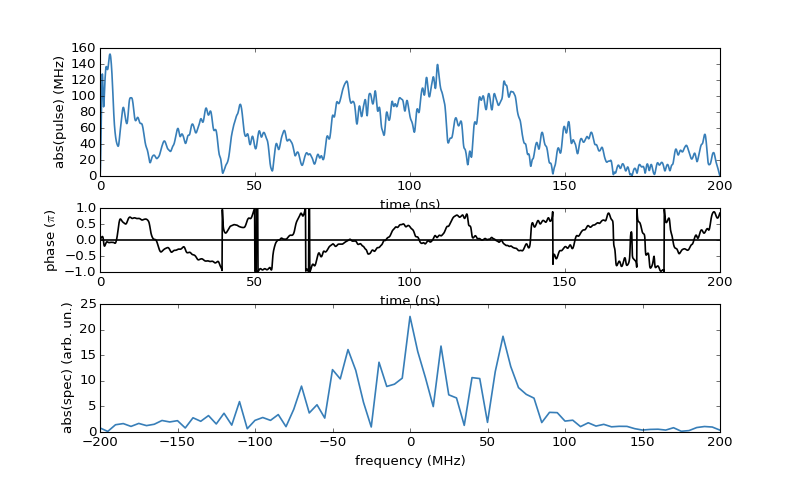

In [50]:
p = Pulse(join(rf_200, 'pulse.dat'), freq_unit='MHz')
p.show(wmin=-200, wmax=200)

<IPython.core.display.Javascript object>


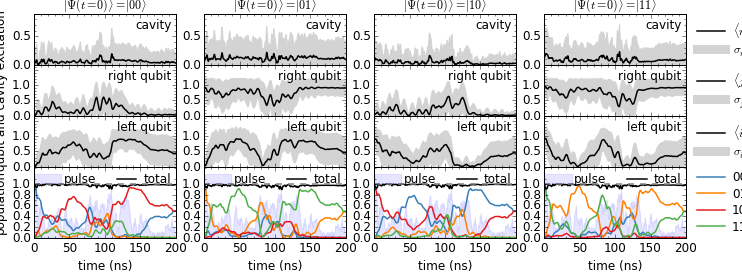

In [55]:
U = propagate(rf_200, 'pulse.dat', rwa=True, force=True, keep=True, use_threads=True)
QDYNTransmonLib.popdyn.PopPlot(rf_200, dpi=72).show()

<IPython.core.display.Javascript object>


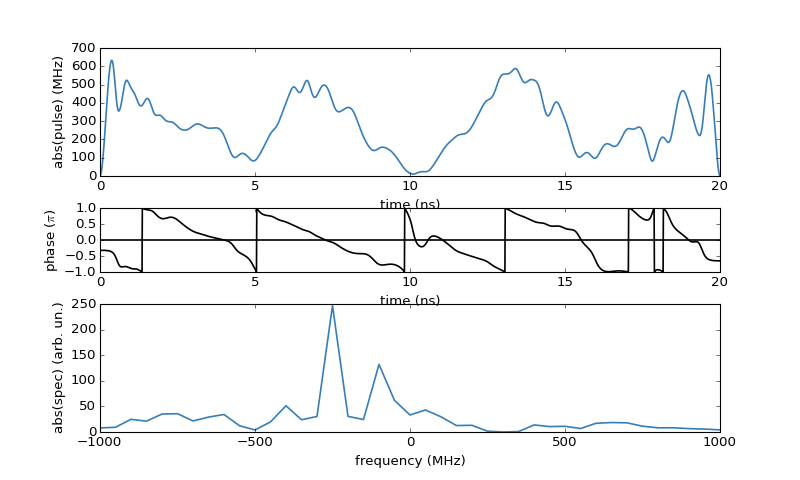

In [51]:
p = Pulse(join(rf_20, 'pulse.dat'), freq_unit='MHz')
p.show(wmin=-1000, wmax=1000)

<IPython.core.display.Javascript object>


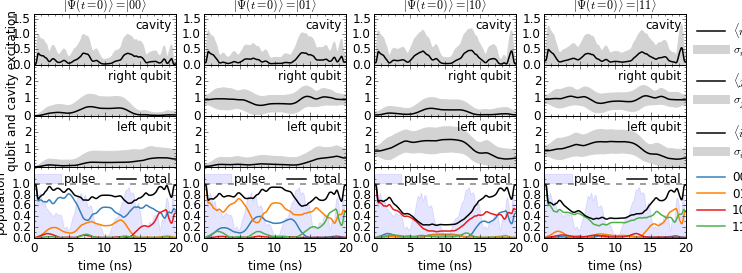

In [56]:
U_20 = propagate(rf_20, 'pulse.dat', rwa=True, force=True, keep=True, use_threads=True)
QDYNTransmonLib.popdyn.PopPlot(rf_20, dpi=72).show()

In [57]:
U_20.pop_loss()

0.023952077534219685

In [31]:
cluster_args = '--cluster-ini=cluster.ini --parallel=38 --jobs=1'

In [30]:
root_prop = './QSL_H1_prop/w2_%dMHz_wc_%dMHz' % (w2*1000, wc*1000)
mkdir(root_prop)
for T in [200, 100, 20, 10]:
    oct_folder = join(root, '%d' % T)
    prop_folder = join(root_prop, 'rho', '%d' % T)
    prepare_prop(oct_folder, prop_folder, dry_run=False)

In [34]:
! ./run_prop.py {cluster_args} --rwa --rho --threads --stage-folder='rho' {root_prop}

In [36]:
err = {}
for T in [10, 20, 100, 200]:
    rf = join(root_prop, 'rho', '%d' % T)
    err[T] = get_Liouville_error(join(rf, 'prop.log'))

In [38]:
for T in sorted(err):
    print "%3d ns: %.2e" % (T, err[T])

 10 ns: 7.34e-02
 20 ns: 2.20e-02
100 ns: 7.65e-03
200 ns: 1.47e-02
